# ETL

In [2]:
import pandas as pd

industrias = pd.read_csv('D:\\HENRY REPO\\Proyecto Final\\Nuevos Datasets\\us_state_6digitnaics_2021.txt', encoding='latin1')
industrias

,STATE,NAICS,ENTRSIZE,FIRM,ESTB,EMPL,EMPLFL_N,PAYR,PAYRFL_N,STATEDSCR,NAICSDSCR,ENTRSIZEDSCR
0,0,--,1,6294604,8148606,128346299,G,8278573947,G,United States,Total,01: Total
1,0,--,2,4009508,4019061,6178498,G,344920532,G,United States,Total,02: <5
2,0,--,3,1021829,1036956,6726092,G,301779028,G,United States,Total,03: 5-9
3,0,--,26,636541,671679,8559070,G,400743270,G,United States,Total,04: 10-19
4,0,--,33,5667878,5727696,21463660,G,1047442830,G,United States,Total,05: <20
...,...,...,...,...,...,...,...,...,...,...,...,...
566955,56,99,1,78,78,153,H,5387,G,Wyoming,Industries not classified,01: Total
566956,56,99,2,70,70,69,G,2287,H,Wyoming,Industries not classified,02: <5
566957,56,99,3,6,6,46,H,1900,H,Wyoming,Industries not classified,03: 5-9
566958,56,99,33,78,78,153,H,5387,G,Wyoming,Industries not classified,05: <20


In [3]:
industrias.describe()

,STATE,ENTRSIZE,FIRM,ESTB,EMPL,PAYR
count,566960.00000,566960.000000,5.669600e+05,5.669600e+05,5.669600e+05,5.669600e+05
mean,27.99453,21.615543,5.284693e+02,6.086067e+02,7.114329e+03,4.396186e+05
std,16.07928,15.699178,1.682469e+04,1.895938e+04,2.379553e+05,1.540066e+07
min,0.00000,1.000000,3.000000e+00,3.000000e+00,0.000000e+00,7.000000e+00
25%,15.00000,2.000000,7.000000e+00,9.000000e+00,8.200000e+01,4.015000e+03
50%,28.00000,33.000000,2.200000e+01,2.800000e+01,3.230000e+02,1.648200e+04
75%,41.00000,35.000000,9.200000e+01,1.170000e+02,1.360000e+03,7.363500e+04
max,56.00000,37.000000,6.294604e+06,8.148606e+06,1.283463e+08,8.278574e+09


In [6]:
industrias.columns

Index(['STATE', 'NAICS', 'ENTRSIZE', 'FIRM', 'ESTB', 'EMPL', 'EMPLFL_N',
       'PAYR', 'PAYRFL_N', 'STATEDSCR', 'NAICSDSCR', 'ENTRSIZEDSCR'],
      dtype='object')

In [4]:
industrias.isnull().sum()

STATE           0
NAICS           0
ENTRSIZE        0
FIRM            0
ESTB            0
EMPL            0
EMPLFL_N        0
PAYR            0
PAYRFL_N        0
STATEDSCR       0
NAICSDSCR       0
ENTRSIZEDSCR    0
dtype: int64

In [5]:
industrias[industrias.duplicated() == True]

,STATE,NAICS,ENTRSIZE,FIRM,ESTB,EMPL,EMPLFL_N,PAYR,PAYRFL_N,STATEDSCR,NAICSDSCR,ENTRSIZEDSCR


In [ ]:
industrias.columns

In [7]:
industrias.STATE.unique()

array([ 0,  1,  2,  4,  5,  6,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55,
       56], dtype=int64)

# EDA

In [ ]:
# AGRUPAMOS POR EL RUBRO DE RESTAURANTES - FULL SERVICES BASANDONOS EN EL CODIGO DEL RUBRO NAICS == '722511'
# FILTRAMOS STATE = 0 YA QUE ESTE VALOR REPRESENTA TODO EL PAIS

industrias.query("NAICS == '722511' and STATE != 0").iloc[:, 1:].groupby(industrias.query("NAICS == '722511' and STATE != 0").STATEDSCR).sum().head()

C:\Users\jhnnc\AppData\Local\Temp\ipykernel_1916\3185824322.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  industrias.query("NAICS == '722511' and STATE != 0").iloc[:, 1:].groupby(industrias.query("NAICS == '722511' and STATE != 0").STATEDSCR).sum().head()


,ENTRSIZE,FIRM,ESTB,EMPL,PAYR
STATEDSCR,,,,,
Alabama,207,8188,9360,160830,3530250
Alaska,207,1931,1974,22879,780819
Arizona,207,12885,14568,273232,7755287
Arkansas,207,6376,6970,104302,2258555
California,207,105251,112240,1424831,49106234


In [10]:
industrias_filtradas=industrias.query("NAICS == '722511' and STATE != 0").iloc[:, 1:].groupby(industrias.query("NAICS == '722511' and STATE != 0").STATEDSCR).sum()

C:\Users\jhnnc\AppData\Local\Temp\ipykernel_1916\985801274.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  industrias_filtradas=industrias.query("NAICS == '722511' and STATE != 0").iloc[:, 1:].groupby(industrias.query("NAICS == '722511' and STATE != 0").STATEDSCR).sum()


## GRAFICAS Y VISUALIZACION

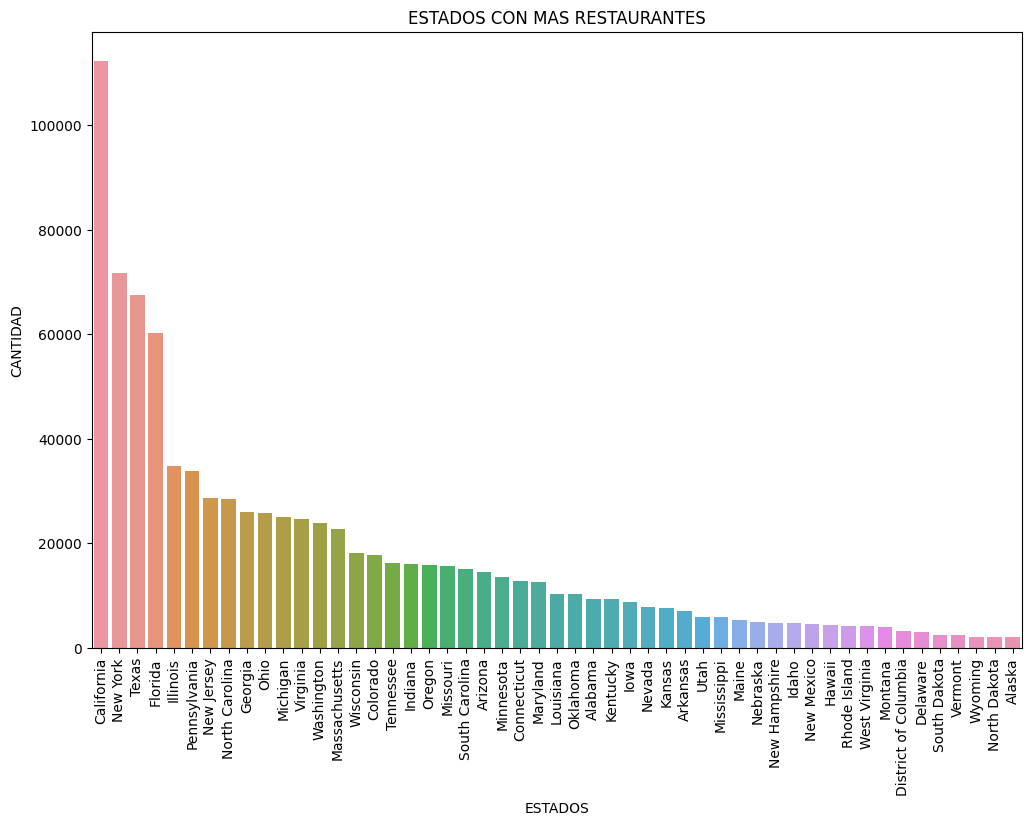

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.barplot(industrias_filtradas.sort_values(by='ESTB', ascending=False), x=industrias_filtradas.sort_values(by='ESTB', ascending=False).index, y=industrias_filtradas.sort_values(by='ESTB', ascending=False).ESTB)
plt.xticks(rotation = 90)
plt.title('ESTADOS CON MAS RESTAURANTES')
plt.xlabel('ESTADOS')
plt.ylabel('CANTIDAD')
plt.show()